In [1]:
import pandas as pd
import datetime as dt

df = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [2]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [3]:
df.describe()

,Id,Score,ViewCount,AnswerCount,FavoriteCount
count,8839.000000,8839.000000,8839.000000,8839.000000,1407.000000
mean,54724.172870,0.870687,171.548026,0.787985,1.184790
std,6507.618509,1.410255,772.813626,0.851146,0.982766
min,43363.000000,-2.000000,2.000000,0.000000,0.000000
25%,48917.500000,0.000000,22.000000,0.000000,1.000000
50%,54833.000000,1.000000,40.000000,1.000000,1.000000
75%,60674.500000,1.000000,98.000000,1.000000,1.000000
max,65675.000000,45.000000,33203.000000,9.000000,16.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [5]:
# Fill in the missing values with 0

df.fillna(0, inplace=True)

In [6]:
# Set the types of each column in accordance to what was illustrated above.

df["FavoriteCount"] = df["FavoriteCount"].astype(int)

In [7]:
# Clean the Tags column and assign it back to itself:

def adjust(string):
    string = string[1:-1]
    string = string.replace("><",",")
    return string

df["Tags"] = df["Tags"].apply(adjust)

In [8]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"machine-learning,data-mining",0,0
1,44420,2019-01-23 09:34:01,0,25,"machine-learning,regression,linear-regression,...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"python,time-series,forecast,forecasting",0,0
3,44427,2019-01-23 10:57:09,0,55,"machine-learning,scikit-learn,pca",1,0
4,44428,2019-01-23 11:02:15,0,19,"dataset,bigdata,data,speech-to-text",0,0


In [9]:
# Transform "Tags" in eine Liste

def str_to_list(x):
    x = x.split(",")
    return x

df["Tags"] = df["Tags"].apply(str_to_list)

In [10]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


In [11]:
#Count how many times each tag was used.

tag_count = {}

for tags in df["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

#Transform into a dataframe

tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

#Sort by value

most_used = tag_count.sort_values(by="Count", ascending=False).head(20)

In [12]:
#Count how many times each tag was viewed.

viewed = {}

for index, row in df.iterrows():
    for tag in row['Tags']:
        if tag in viewed:
            viewed[tag] += row['ViewCount']
        else:
            viewed[tag] = row['ViewCount']
            
#Transform into a dataframe

tag_view_count = pd.DataFrame.from_dict(viewed, orient="index")
tag_view_count.rename(columns={0: "Count"}, inplace=True)

#Sort by value

most_viewed = tag_view_count.sort_values(by="Count", ascending=False).head(20)
most_viewed

,Count
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feca3d6e990>],
      dtype=object)

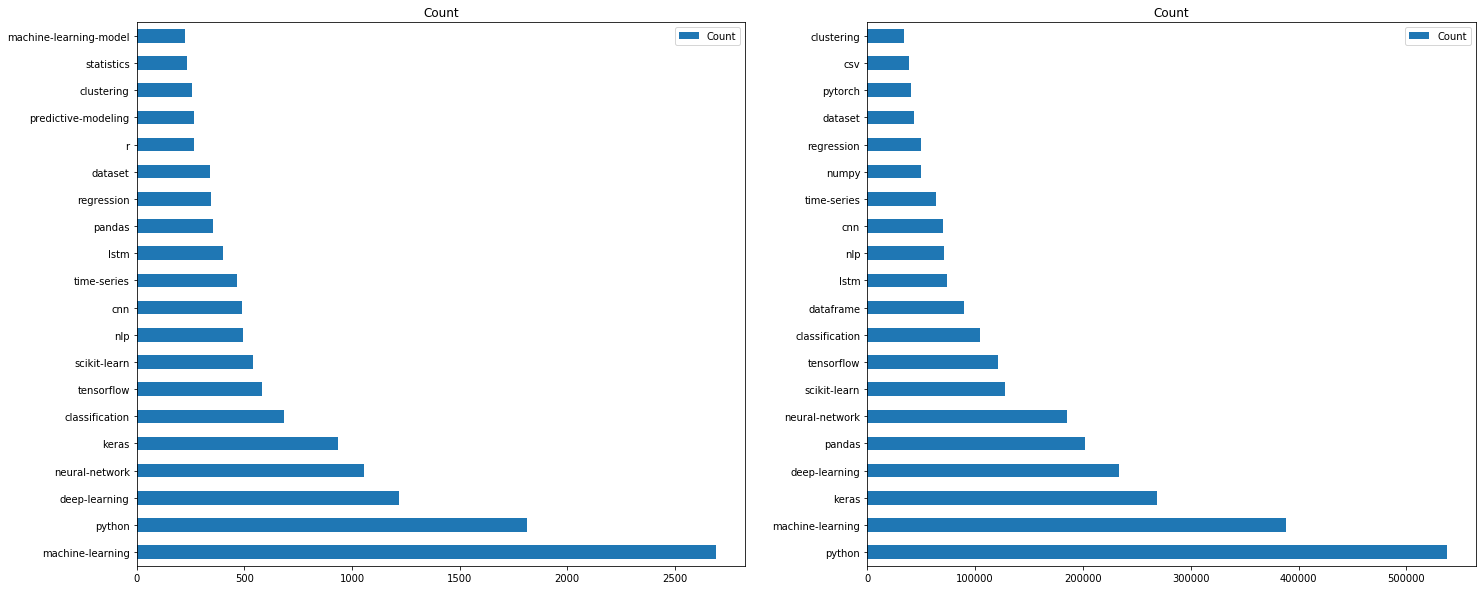

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

In [15]:
#Merge both dataframes

# Left join 
in_used_left = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)

The tags present in most_used and not present in most_viewed are:

* machine-learning-model
* statistics
* predictive-modeling
* r

In [16]:
# Right join
in_used_right = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

And the tags present in most_viewed but not in most_used are:

* csv
* pytorch
* dataframe

Brainstorm some ways in which you could find relationships between pair of tags and between multiple tags

* Subset of an topic (like pandas of python)
* Related technical fields (like neural-network and deep learning) 

Observation: The most used tags are also the most viewed. From the top 10 tags of each, here's a list of the tags in common: 

* python, 
* machine-learning, 
* deep-learning, 
* neural-network, 
* keras, 
* tensorflow,
* classification,
* scikit-learn

"deep-learning" and "machine-learning" seem to be the overarchig topics, while the other tags are subset of the aforementioned.

# Relations Between Tags

In [33]:
all_tags = list(tag_count.index)

In [35]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,machine-learning,data-mining,regression,linear-regression
machine-learning,NaN,NaN,NaN,NaN
data-mining,NaN,NaN,NaN,NaN
regression,NaN,NaN,NaN,NaN
linear-regression,NaN,NaN,NaN,NaN


In [36]:
associations.fillna(0, inplace=True)

for tags in df["Tags"]:
    associations.loc[tags, tags] += 1

In [37]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


In [38]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

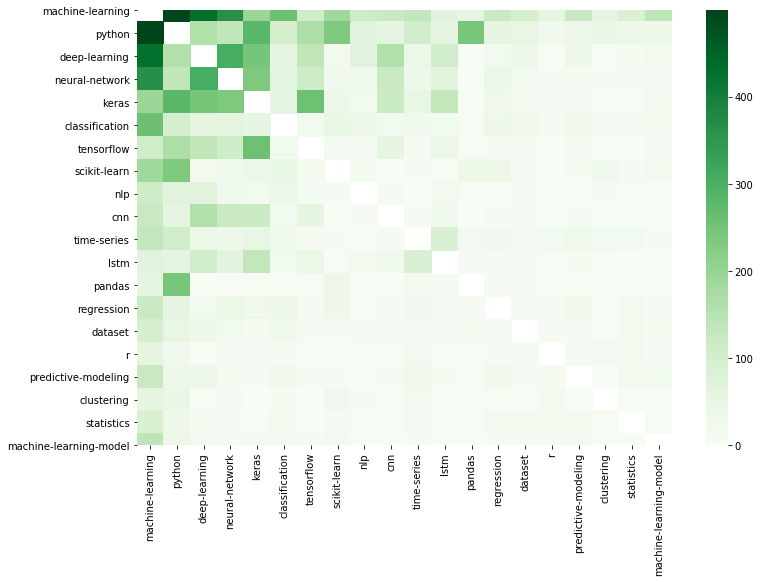

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

# Check relevance of "deep-learning"

In [17]:
#Read "all_"

dfall = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

In [18]:
dfall.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [19]:
# Clean the Tags column and assign it back to itself:

def adjust(string):
    string = string[1:-1]
    string = string.replace("><",",")
    return string

dfall["Tags"] = dfall["Tags"].apply(adjust)

In [20]:
dfall.tail()

,Id,CreationDate,Tags
21571,36971,2018-08-15 14:19:01,"statistics,data"
21572,36974,2018-08-15 14:40:27,"machine-learning,neural-network,classifier"
21573,36975,2018-08-15 14:53:43,"machine-learning,classification"
21574,36979,2018-08-14 19:31:43,"tensorflow,python"
21575,36985,2018-08-15 17:01:29,"python,deep-learning,tensorflow"


In [21]:
dfall.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"python,keras,tensorflow,cnn,probability"
1,45418,2019-02-12 00:50:39,neural-network
2,45422,2019-02-12 04:40:51,"python,ibm-watson,chatbot"
3,45426,2019-02-12 04:51:49,keras
4,45427,2019-02-12 05:08:24,"r,predictive-modeling,machine-learning-model,s..."


In [22]:
#Decide on an adequate timeframe and track interest in deep learning across that timeframe:

x = dt.datetime(2019, 1, 1)
y = dt.datetime(2019, 1, 31)

In [23]:
dfall = dfall[(dfall["CreationDate"] >= x) & (dfall["CreationDate"] <= y)]

In [24]:
#How many question have been asked in January 2019?

dfall.shape

(534, 3)

In [25]:
#Convert Tags-column to lists

def str_to_list(x):
    x = x.split(",")
    return x

dfall["Tags"] = dfall["Tags"].apply(str_to_list)

In [26]:
#Count how many deep learning questions are asked per time period.

def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [27]:
dfall["deep-learning"] = dfall["Tags"].apply(class_deep_learning)

In [29]:
dfall.head()

,Id,CreationDate,Tags,deep-learning
12690,43363,2019-01-01 03:53:02,"[machine-learning, nlp]",0
12691,43366,2019-01-01 06:02:07,"[deep-learning, convnet, image-classification]",1
12692,43367,2019-01-01 06:16:26,"[scikit-learn, tensorflow, scipy]",1
12693,43370,2019-01-01 10:06:03,[classification],0
12694,43374,2019-01-01 13:18:02,"[deep-learning, time-series, cnn, convolution]",1


In [30]:
# traverse for all elements 
dl_sum = dfall["deep-learning"].sum()
print(dl_sum)

207


In [31]:
ratio = (dl_sum / dfall.shape[0])*100
print(ratio)

38.764044943820224


Final Oberservation: In the chosen timeframe "January 2019" were in total 534 questions asked. 207 of them have a tag out of the "deep-learning"-group. That accounts to a ratio of about 39%.